<a href="https://colab.research.google.com/github/lionelalexandre/4TPU271/blob/main/S2_TD1_python_notebook_en_teacher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:blue"> <center>Teacher / DS : 4TPU271 & 4TPU279U $-$ Licence 1ère année $-$ printemps 2023</center></span>
# <center>Méthodes Numériques pour les Sciences</center>
# <hr style="border:1px solid black"><center>DS1 : Introduction à la programmation Python </center><hr style="border:1px solid black">
</br>

<span style="color:red"> A la fin de l'épreuve, déposer ce fichier **notebook** complété ou un fichier **python** édité via Spyder, sur la page
[Moodle](https://moodle1.u-bordeaux.fr/course/view.php?id=12271) consacrée à votre demi-groupe. </span>


<span style="color:red"> Renommer votre fichier suivant le protocole  </span>: 
- `DST_NomPrenom_S2.ipynb` pour un fichier *jupyter-notebook*

ou 

- `DST_NomPrenom_S2.py` pour un fichier *python* pur

<div class="alert alert-block alert-warning">
<b>ATTENTION :</b> Abolir totalement l’emploi des espaces, lettres accentuées et autres symboles
dans le nom du fichier !
</div>

**Les points suivants seront pris en compte pour l'évaluation :**
- respect des consignes
- mise en forme des figures (légendes, unités, titre etc...)
- clarté des programmes et mise en page

</br>
<div style="text-align: right"> Credits: R. Boisgard, L. Truflandier, Philippe Paillou, Julien Burgin, Sara Zein, Leo Delmarre, Simon Villain-Guillot, Louise Marinho </div>


## <hr style="border:1px solid black"> Exercice 1 : potentiel de Morse et représentation graphique <hr style="border:1px solid black">

On souhaite étudier le potentiel de Morse de la molécule de Cl$_2$ décrivant la variation d'énergie potentielle en fonction de la distance $x$ entre les 2 atomes de Chlore. Son expression est donnée par :

$$ V(x) = D_e \left( 1 - e^{-\beta (x-x_{e})}\right)^2 - D_e$$

On remarquera :
- $\lim_{x\rightarrow\infty}V(x) = 0 $.
- $\frac {d V(x)}{dx} = 0$ pour $x = x_e$ ; $x_e$ correspond à la distance d'équilibre des 2 atomes.
- $V(x_e)=-D_e$ ; l'énergie potentielle est minimale en $x = x_e$ et vaut moins l'énergie de dissociation $D_e$.

Pour Cl$_2$ on donne : $D_e = 2.514$ eV, $x_e=2.0$ Å et $\beta=2.0$ Å$^{-1}$.

1. Représenter graphiquement le potentiel de Morse. Respecter les consignes suivantes pour le tracé :
    - En utilisant la fonction `linspace`, représenter $V$ en fonction de $x$ pour $x\in[1.4,5.0]$ avec 256 point de discrétisation.
    - Légender les axes avec les unités.
    - Faire apparaître un axe horizontal en pointillé noir correspondant au zéro d'énergie potentielle.
    - Localiser $x_e$ par un cercle noir sur la courbe.
    - Le domaine du tracé sera borné : suivant l'axe des absisses de 1.4 à 5.0, et de -2.7 à 2.7
    suivant l'axe des ordonnées. Utiliser les fonctions `xlim` et `ylim` comme proposé ci-dessous.

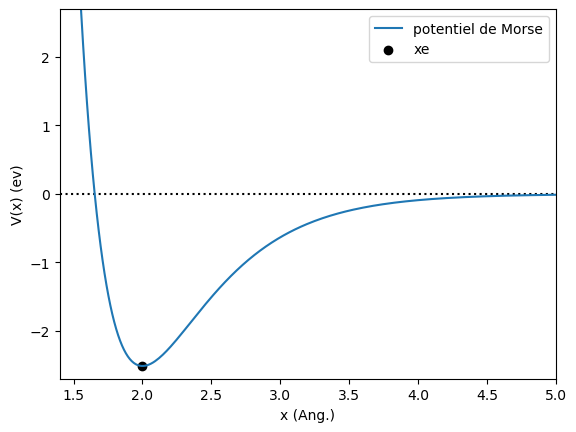

In [333]:
from numpy import exp, linspace
import matplotlib.pyplot as plt
import numpy as np

De = 2.514 # ev
xe = 2.0 # angstrom
beta = 2.0 # angstrom^-1

def morse_pot(x):
    return De * (1 - np.exp(-beta*(x-xe)))**2 - De

x = np.linspace(1.4, 5.0, 256)
V = morse_pot(x)

plt.plot(x, np.zeros(len(x)), color="black", linestyle="dotted")
plt.plot(x, V, label="potentiel de Morse")
plt.scatter(xe, -De, color="black", marker="o", label="xe")
plt.legend()

plt.ylabel("V(x) (ev)")
plt.xlabel("x (Ang.)")

# Limites suivant x pour le tracé 
plt.xlim( 1.4,5.0)
# Limites suivant y pour le tracé 
plt.ylim(-2.7,2.7)

plt.show()

Pour des faibles variations de $x$ au voisinage de $x_e$, on peut assimiler le potentiel de Morse comme
l'énergie potentielle d'un oscillateur harmonique. Le développement au deuxième ordre de Taylor de $V(x)$ au voisinage the $x_e$ permet d'approximer $V(x)$ par :

$$ V_\text{harm}(x) = \beta^2 D_e(x-x_e)^2 -D_e$$

2. Reprendre le graphique précédent et ajouter le potentiel harmonique $V_\text{harm}(x)$. Faire afficher la légende de chaque graphique. Ne pas oublier de borner la représentation comme dans la question précédente. Légender les courbes.

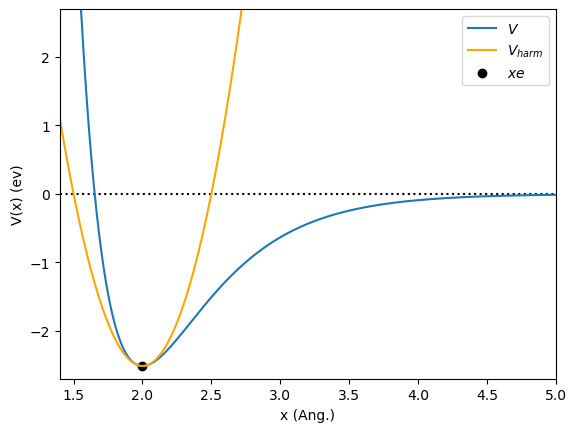

In [334]:
from numpy import exp, linspace
import matplotlib.pyplot as plt

def harm_pot(x):
    return ( beta**2 * De * (x-xe)**2 ) - De

V_harm = harm_pot(x)

plt.plot(x, np.zeros(len(x)), color="black", linestyle="dotted")
plt.plot(x, V, label="$V$")
plt.plot(x, V_harm, color="orange", label="$V_{harm}$")
plt.plot()
plt.scatter(xe, -De, color="black", marker="o", label="$xe$")
plt.legend()

plt.ylabel("V(x) (ev)")
plt.xlabel("x (Ang.)")

# Limites suivant x pour le tracé 
plt.xlim( 1.4,5.0)
# Limites suivant y pour le tracé 
plt.ylim(-2.7,2.7)

plt.show()

3. Représenter l'écart $V(x) - V_\text{harm}(x)$ sur un nouveau graphique pour $x\in[1.95,2.05]$. Légender les axes.

(0.003, -0.003)

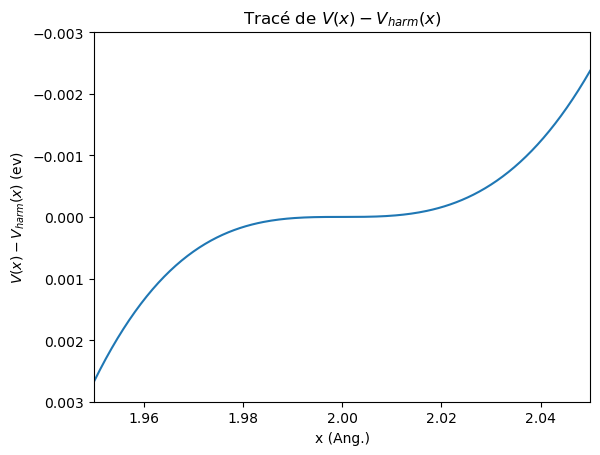

In [335]:
import matplotlib.pyplot as plt



new_x = np.linspace(1.95, 2.05, 256)
diff = morse_pot(new_x) - harm_pot(new_x)
plt.plot(new_x, diff)
plt.title("Tracé de $V(x) - V_{harm}(x)$")
plt.ylabel("$V(x)-V_{harm}(x)$ (ev)")
plt.xlabel("x (Ang.)")

# Limites suivant x pour le tracé 
plt.xlim( 1.95,2.05)
# Limites suivant y pour le tracé 
plt.ylim(0.003,-0.003)

#plt.xlabel('$x$ in Ang.')
#plt.ylabel('$V(x)-V_\mathrm{harm}(x)$ in eV')





<hr style="border:1px solid grey">

## <hr style="border:1px solid black"> Exercice 2 : résolution numérique des équations de la dynamique <hr style="border:1px solid black">

> On souhaite étudier le mouvement d'un des atomes de chlore soumis à la force dérivant du potentiel harmonique $V_\text{harm}(x)$ tel que : $$\vec{f}=-\frac{dV_\text{harm}}{dx}\:\vec{e}_x=-k(x-x_e)\:\vec{e}_x \quad\quad\text{(1)}$$
avec $k=2\beta^2D_e$ la constante de force de la liaison Cl$-$Cl. Pour l'intégration numérique des équations du mouvement, on utilisera la méthode de Hooke-Newton décrite ci-dessous :
$$\begin{align}
x(t_{i+1}) &= x(t_i) + h\;v(t_i) \quad\quad\quad\quad\ \ \text{(2)}\\   
v(t_{i+1}) &= v(t_i)+\frac{h}m f\left(x(t_{i+1})\right)\quad\quad\text{(3)} \\ 
\end{align}$$
avec $m=35.5$ g/mol, la masse de l'atome Cl et $h$ le pas de temps en unité de temps réduite (utr ; 1 utr $\simeq 10^{-14}$ s)

1. A partir des constantes $\beta$ et $D_e$ données précédemment, calculer la valeur $k$ en eV$\cdot$Å$^{-2}$ et N$\cdot$m$^{-1}$.
Pour les conversions, on utilisera les constantes physiques de la librarie `scipy.constants`. Par la suite on prendra $k=20.112$ eV$\cdot$Å$^{-2}$.

In [336]:
from scipy.constants import e

De   = 2.514 # eV
beta = 2.00  # Ang^-1
k = 2 * beta**2 * De

'''
def f(x):
    return -k*(x-xe)
'''

#k = 
print(' k = %.3f eV.Ang^-2'%k)

#k = 
print(' k = %.1f N.m^-1'%k)

k = 20.112

 k = 20.112 eV.Ang^-2
 k = 20.1 N.m^-1


2. Utiliser l'algorithme de Hooke-Newton pour simuler le déplacement de l'atome de Cl autour de sa position d'équilibre. Le temps d'étude sera de $t_\textrm{max}=4\pi\sqrt{m/k}=16.695$ utr, avec un pas de discrétisation $h=0.01$. On utilisera les conditions initiales :
- $x(t_0)=2.02$ Å 
- $v(t_0)=0.0$

On prendra une masse $m=35.5$ g/mol.

***Pour vous guider reprendre les différentes étapes du TD4 données ci-dessous :***

> On commence par définir la force, cf. **équation (1)**, *via* une fonction `f`:

In [337]:
def f(x):
    xe = 2.0
    return - k*(x - xe)

#tmax = 16.695 # utr

#x0 = 2.02 # ang.
#v0 = 0.0


> On initialise $m$ et on discrétise l'axe du temps :

In [338]:
from numpy import pi, arange, sqrt

m = 35.5 # g/mol

tmin = 0
tmax = 4*pi*sqrt(m/k)

h = 0.01
t = np.arange(tmin, tmax, h)

> On initialise les tableaux pour $x$ et $v$ ainsi que les conditions initiales :

In [339]:
from numpy import zeros

x = np.zeros(len(t)) 
v = np.zeros(len(t))

x0 = 2.02 # ang.
v0 = 0.0 # ang/utr

> On applique la relation de récurrence de Hooke-Newton à $x$ et à $v$ :

In [340]:
x[0] = x0
v[0] = v0

for i in range(len(t)-1):
    x[i+1] = x[i] + h*v[i]
    v[i+1] = v[i] + h*f(x[i+1])/m

> Sauvegarder la position $x$ et la vitesse $v$ dans 2 tableaux `x_harm` et `v_harm` pour une utilisation ultérieure

In [341]:
x_harm = x
v_harm = v

> Tracer des lois horaires $x(t)$ et $v(t)$ sur 2 figures différentes

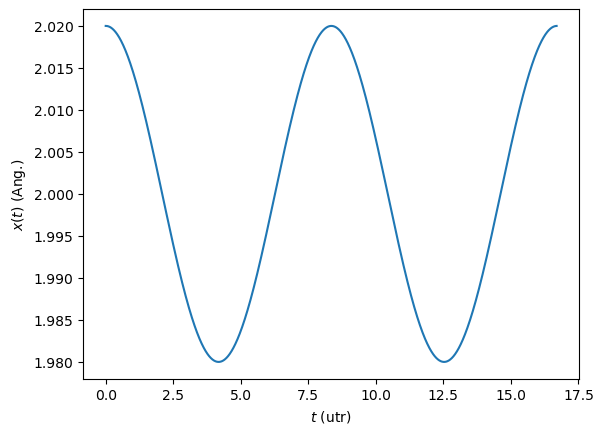

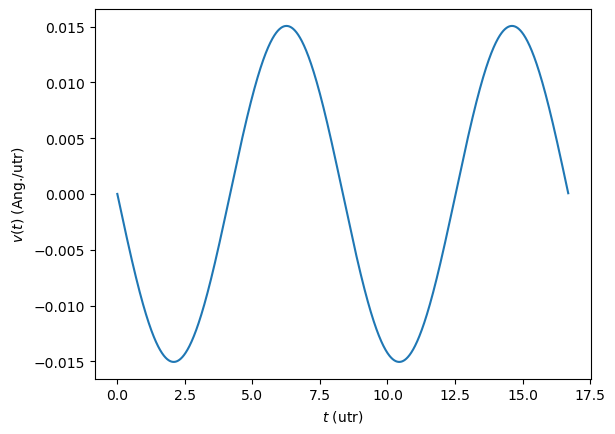

In [342]:
import matplotlib.pylab as plt

plt.plot(t, x_harm)
plt.xlabel("$t$ (utr)")
plt.ylabel("$x(t)$ (Ang.)")
plt.show()

plt.plot(t, v_harm)
plt.xlabel("$t$ (utr)")
plt.ylabel("$v(t)$ (Ang./utr)")
plt.show()

In [343]:
import matplotlib.pylab as plt

> Tracer du portrait de phase $(x(t),v(t))$ et repérage des conditions initiales :

Text(0, 0.5, '$v(t)$')

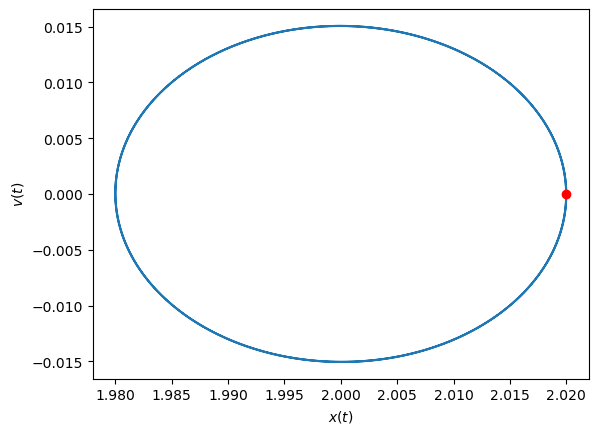

In [344]:
plt.plot(x_harm, v_harm)
plt.plot(x0, v0, marker="o", color="red")
plt.xlabel("$x(t)$")
plt.ylabel("$v(t)$")

3. Reprendre la résolution des équations de la dynamique pour une force dérivant du potentiel de Morse. L'expression est donnée ci-dessous :
$$\vec{f}=-\frac{dV}{dx}\:\vec{e}_x=-2\beta D_e\left( e^{-\beta (x-x_e)} - e^{-2\beta (x-xe)} \right) \:\vec{e}_x \quad\quad\text{(4)}$$

> On commence par définir la force, cf. **équation (4)**, *via* une fonction `f`:

In [345]:
def f_morse(x):
    return -2*beta*De * (np.exp(-beta*(x-xe)) - np.exp(-2*beta*(x-xe)))

> On initialise $m$ et on discrétise l'axe du temps :

In [346]:
m = 35.5 # g/mol

tmin = 0
tmax = 4*pi*sqrt(m/k)

h = 0.01
t = np.arange(tmin, tmax, h)

> On initialise les tableaux pour $x$ et $v$ ainsi que les conditions initiales :

In [347]:
x_morse = np.zeros(len(t))
v_morse = np.zeros(len(t))

x0 = 2.02 # ang.
v0 = 0.0 # ang/utr


> On applique la relation de récurrence de Hooke-Newton à $x$ et à $v$ :

In [348]:
x_morse[0] = x0
v_morse[0] = v0

for i in range(len(t)-1):
    x_morse[i+1] = x_morse[i] + h*v_morse[i]
    v_morse[i+1] = v_morse[i] + h/m*f_morse(x_morse[i+1])
    
    

> Sauvegarder la position $x$ et la vitesse $v$ dans 2 tableaux `x_morse` et `v_morse`.

In [349]:
#x_morse = x
#v_morse = v

'''
Déjà fait
'''

'\nDéjà fait\n'

> Sur un même graphique tracer des lois horaires $v_\text{harm}(t)$ et $v_\text{morse}(t)$ ; sur un autre graphique tracer $x_\text{harm}(t)$ et $x_\text{morse}(t)$.

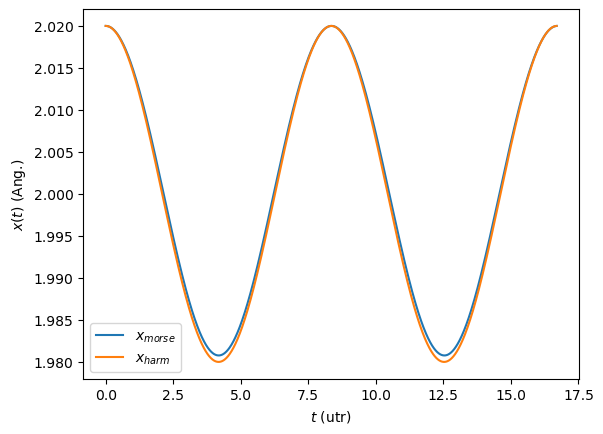

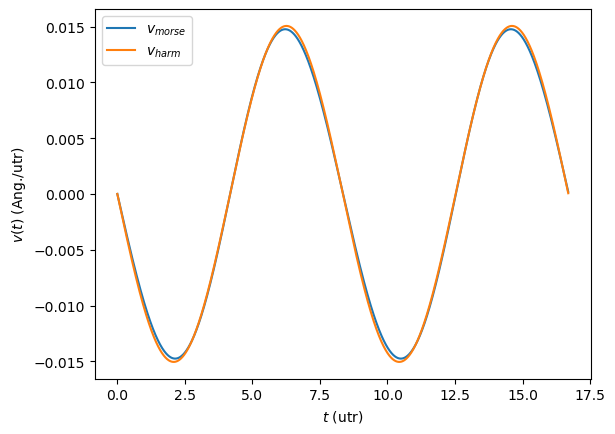

In [350]:
import matplotlib.pylab as plt

plt.plot(t, x_morse, label="$x_{morse}$")
plt.plot(t, x_harm, label="$x_{harm}$")
plt.xlabel("$t$ (utr)")
plt.ylabel("$x(t)$ (Ang.)")
plt.legend()
plt.show()

plt.plot(t, v_morse, label="$v_{morse}$")
plt.plot(t, v_harm, label="$v_{harm}$")
plt.xlabel("$t$ (utr)")
plt.ylabel("$v(t)$ (Ang./utr)")
plt.legend()
plt.show()

In [351]:
import matplotlib.pylab as plt

> Tracer des portraits de phase $(x_\text{morse}(t)v_\text{morse}(t))$ et $(x_\text{harm}(t)v_\text{harm}(t))$ et repérer des conditions initiales :

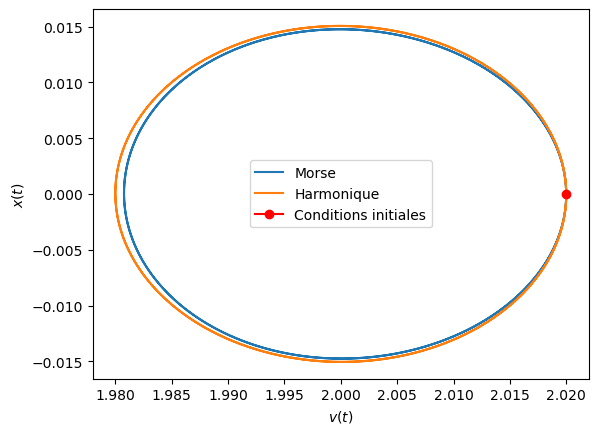

In [352]:
import matplotlib.pylab as plt

plt.plot(x_morse, v_morse, label="Morse")
plt.plot(x_harm, v_harm, label="Harmonique")
plt.plot(x0, v0, marker="o", color="red", label="Conditions initiales")
plt.xlabel("$v(t)$")
plt.ylabel("$x(t)$")
plt.legend()
plt.show()





4. Reprendre les questions 2. et 3. avec les conditions initiales :
- $x(t_0)=2.2$ Å 
- $v(t_0)=0$ Å/utr

## Re-Exercise 2

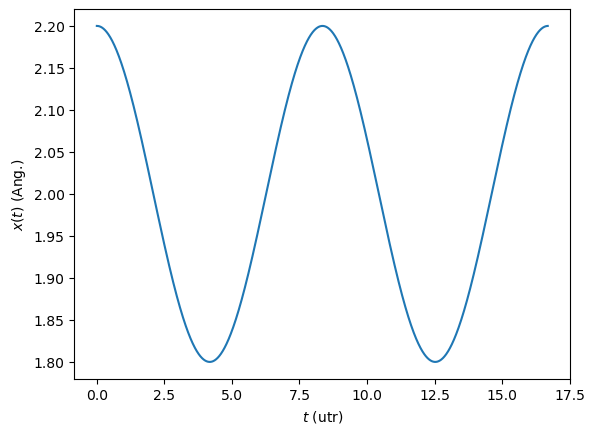

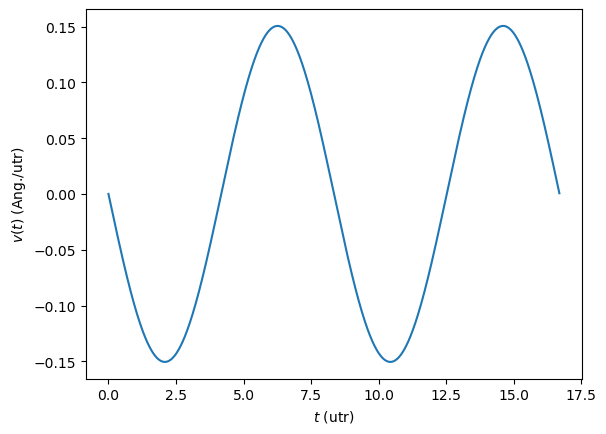

Text(0, 0.5, '$x(t)$')

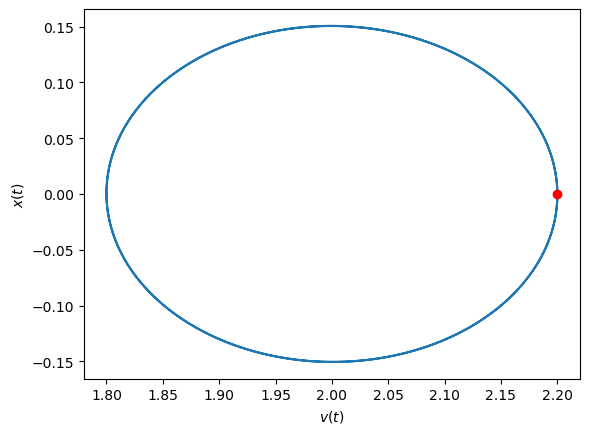

In [353]:
x02 = 2.2 # ang.
v02 = 0.0 # ang/utr

tmin = 0
tmax = 4*pi*sqrt(m/k)

h = 0.01
t = np.arange(tmin, tmax, h)

x_harm2 = np.zeros(len(t))
v_harm2 = np.zeros(len(t))

x_harm2[0] = x02
v_harm2[0] = v02

for i in range(len(t)-1):
    x_harm2[i+1] = x_harm2[i] + h*v_harm2[i]
    v_harm2[i+1] = v_harm2[i] + h*f(x_harm2[i+1])/m
    


plt.plot(t, x_harm2)
plt.xlabel("$t$ (utr)")
plt.ylabel("$x(t)$ (Ang.)")
plt.show()

plt.plot(t, v_harm2)
plt.xlabel("$t$ (utr)")
plt.ylabel("$v(t)$ (Ang./utr)")
plt.show()

plt.plot(x_harm2, v_harm2)
plt.plot(x02, v02, marker="o", color="red")
plt.xlabel("$v(t)$")
plt.ylabel("$x(t)$")


    


## Re-Exercise 3

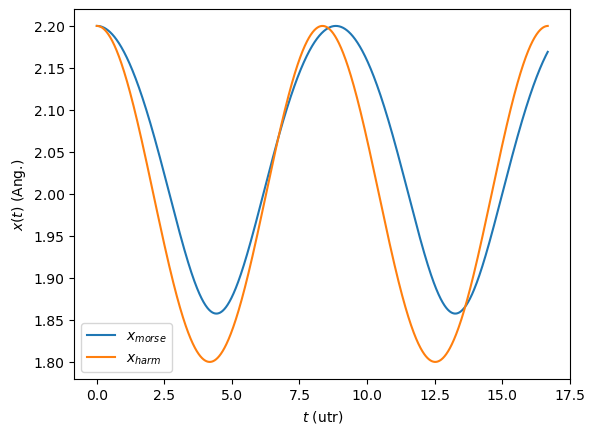

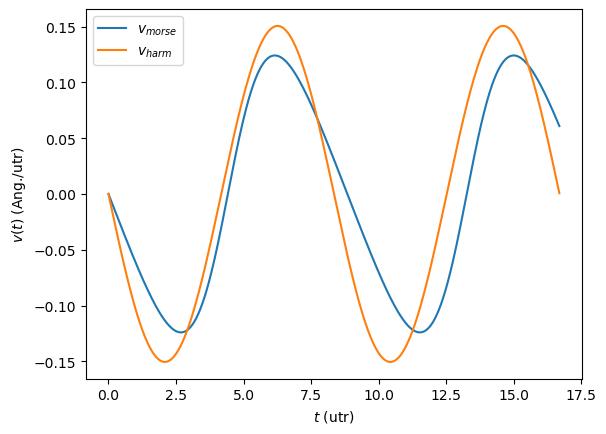

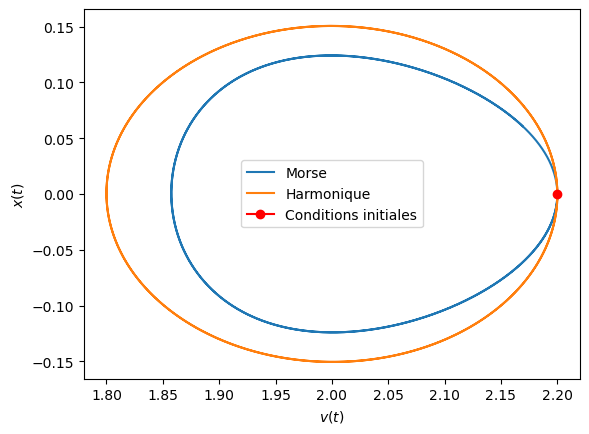

In [354]:
x_morse2 = np.zeros(len(t))
v_morse2 = np.zeros(len(t))

x_morse2[0] = x02
v_morse2[0] = v02

for i in range(len(t)-1):
    x_morse2[i+1] = x_morse2[i] + h*v_morse2[i]
    v_morse2[i+1] = v_morse2[i] + h*f_morse(x_morse2[i+1])/m
    
plt.plot(t, x_morse2, label="$x_{morse}$")
plt.plot(t, x_harm2, label="$x_{harm}$")
plt.xlabel("$t$ (utr)")
plt.ylabel("$x(t)$ (Ang.)")
plt.legend()
plt.show()

plt.plot(t, v_morse2, label="$v_{morse}$")
plt.plot(t, v_harm2, label="$v_{harm}$")
plt.xlabel("$t$ (utr)")
plt.ylabel("$v(t)$ (Ang./utr)")
plt.legend()
plt.show()

plt.plot(x_morse2, v_morse2, label="Morse")
plt.plot(x_harm2, v_harm2, label="Harmonique")
plt.plot(x02, v02, marker="o", color="red", label="Conditions initiales")
plt.xlabel("$v(t)$")
plt.ylabel("$x(t)$")
plt.legend()
plt.show()


## <hr style="border:1px solid black"> Exercice bonus : double factoriel (pair) <hr style="border:1px solid black">

Pour un entier $n$ **pair**, le double factoriel, $n!!$, est donné par :

$$\sum^{\frac{n}{2}}_{k=1}(2k)=2\times4\times\cdots(n-4)(n-2)n$$

Ecrire un programme permettant le calcul de $n!!$. Tester votre programme avec $n=12$ et comparer au résultat
obtenu avec la fonction `factorial2()` de la librairie `scipy`.

In [355]:
from scipy.special import factorial2

n = 12

print(factorial2(n))

46080.0


In [356]:
# Recursive function

def fact(n):
    if n <= 1:
        return 1
    return n*fact(n-2)

N = 12

print(f"{N}!! = {fact(12)}")

# For loop

res = 1
for i in range(2, N+1, 2):
    res *= i
print(f"{N}!! = {res}")


12!! = 46080
12!! = 46080


Le même résultat est obtenu